# Quantum Inspire performance test

We compare performance of the simulator with the circuit from "Overview and Comparison of Gate Level Quantum Software Platforms", https://arxiv.org/abs/1807.02500

In [10]:
import numpy as np
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_histogram

from qiskit_quantuminspire.qi_provider import QIProvider

We define the circuit based on the number of qubits and the depth (e.g. the number of iterations of the unit building block).

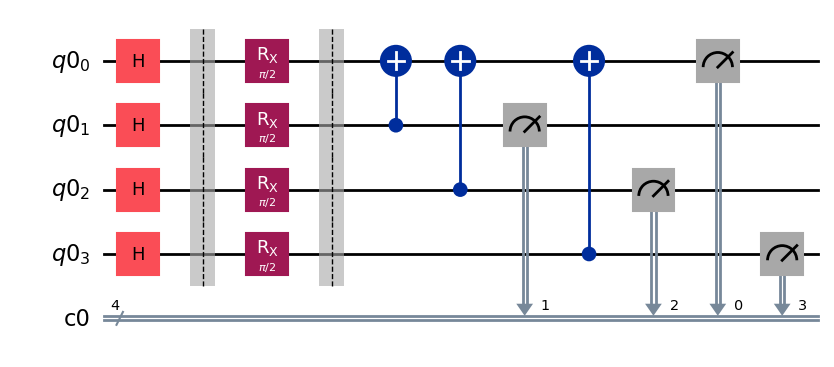

In [2]:
def pcircuit(nqubits, depth=10):
    """Circuit to test performance of quantum computer"""
    q = QuantumRegister(nqubits)
    ans = ClassicalRegister(nqubits)
    qc = QuantumCircuit(q, ans)

    for level in range(depth):
        for qidx in range(nqubits):
            qc.h(q[qidx])
        qc.barrier()
        for qidx in range(nqubits):
            qc.rx(np.pi / 2, q[qidx])
        qc.barrier()

        for qidx in range(nqubits):
            if qidx != 0:
                qc.cx(q[qidx], q[0])
    for qidx in range(nqubits):
        qc.measure(q[qidx], ans[qidx])
    return q, qc


q, qc = pcircuit(4, 1)
qc.draw(output="mpl")

### Run the cirquit on the Quantum Inspire Platform
First we make a connection to the Quantum Inspire platform and choose a backend.

In [3]:
provider = QIProvider()
backend = provider.get_backend(name="QX emulator")

We run the job for a certain amount of shots in the chosen backend and wait for the results.

In [27]:
job = backend.run(qc, shots=1024)
results = job.result(wait_for_results=True)

We visualize the histogram with matplotlib.

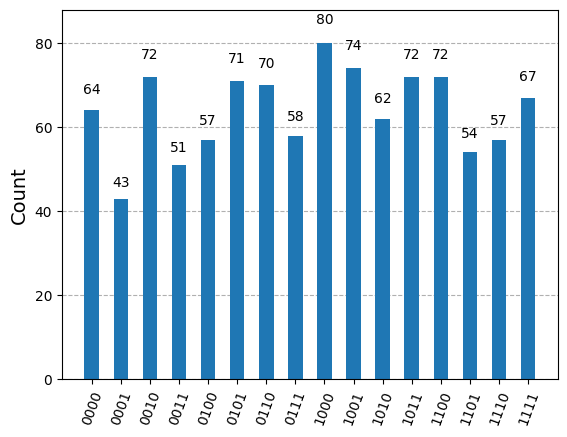

In [28]:
counts = results.data()["counts"]
result_map = {}
for key in counts:
    bin_str = format(int(key, 16), "04b")
    result_map[bin_str] = counts[key]

plot_histogram(result_map)